In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from nistats.second_level_model import SecondLevelModel
from nistats.design_matrix import make_second_level_design_matrix
from nistats.reporting import plot_design_matrix, get_clusters_table
from nistats.thresholding import map_threshold
from nilearn import plotting

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  import sys
/home/lussier/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Statistical comparisons of average NIAK connectomes 
=========================================================

In [2]:
#Load the R2 maps generated from the previously run dypac embeddings model.
path_base = '/home/lussier/Projects/'
func_path = 'data/simon/output_simon_connectome/rmap_seeds/'

In [3]:
#Load the R2 maps generated from the previously run dypac embeddings model.
cer_func = []
cer_func_file = open((os.path.join(path_base,func_path, 'cer_noge.txt')),'r')
for line in cer_func_file:
    cer_func.append(os.path.join(path_base,func_path, (line.strip())))
cer_func_file.close()

dmn_func = []
dmn_func_file = open((os.path.join(path_base,func_path, 'dmn_noge.txt')),'r')
for line in dmn_func_file:
    dmn_func.append(os.path.join(path_base,func_path, (line.strip())))
dmn_func_file.close()

fp_func = []
fp_func_file = open((os.path.join(path_base,func_path, 'fp_noge.txt')),'r')
for line in fp_func_file:
    fp_func.append(os.path.join(path_base,func_path, (line.strip())))
fp_func_file.close()

lim_func = []
lim_func_file = open((os.path.join(path_base,func_path, 'lim_noge.txt')),'r')
for line in lim_func_file:
    lim_func.append(os.path.join(path_base,func_path, (line.strip())))
lim_func_file.close()

mot_func = []
mot_func_file = open((os.path.join(path_base,func_path, 'mot_noge.txt')),'r')
for line in mot_func_file:
    mot_func.append(os.path.join(path_base,func_path, (line.strip())))
mot_func_file.close()

vat_func = []
vat_func_file = open((os.path.join(path_base,func_path, 'vat_noge.txt')),'r')
for line in vat_func_file:
    vat_func.append(os.path.join(path_base,func_path, (line.strip())))
vat_func_file.close()

vis_func = []
vis_func_file = open((os.path.join(path_base,func_path, 'vis_noge.txt')),'r')
for line in vis_func_file:
    vis_func.append(os.path.join(path_base,func_path, (line.strip())))
vis_func_file.close()

print(cer_func)

['/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon00501_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01101_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01102_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01301_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01401_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01501_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01601_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01701_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01801_CER.nii.gz', '/home/lussier/Projects/data/simon/output_simon_connectome/rmap_seeds/rmap_simon01901_CER.nii.gz', '/home/lu

In [4]:
# Load the .csv with the phenotypic data containing only philips and siemens scanners
behavioral = pd.read_csv('/home/lussier/Projects/human_phantom_replication/SIMON_pheno_connectome_noge.csv', header = 0, sep=',')
for row in behavioral:
    print(row)

FILEID_CER
FILEID_DMN
FILEID_FP
FILEID_LIM
FILEID_MOT
FILEID_VAT_SAL
FILEID_VIS
Session
Run
Acquisition_date
institution_name
manufacturer
manufacturer_recode
man_model_name
Age
Handedness


In [5]:
#Load the file ids from the csv
cer_file_id = behavioral['FILEID_CER'].values
dmn_file_id = behavioral['FILEID_DMN'].values
fp_file_id = behavioral['FILEID_FP'].values
lim_file_id = behavioral['FILEID_LIM'].values
mot_file_id = behavioral['FILEID_MOT'].values
vat_file_id = behavioral['FILEID_VAT_SAL'].values
vis_file_id = behavioral['FILEID_VIS'].values

print(cer_file_id)

['rmap_simon00501_CER.nii.gz' 'rmap_simon01101_CER.nii.gz'
 'rmap_simon01102_CER.nii.gz' 'rmap_simon01301_CER.nii.gz'
 'rmap_simon01401_CER.nii.gz' 'rmap_simon01501_CER.nii.gz'
 'rmap_simon01601_CER.nii.gz' 'rmap_simon01701_CER.nii.gz'
 'rmap_simon01801_CER.nii.gz' 'rmap_simon01901_CER.nii.gz'
 'rmap_simon02001_CER.nii.gz' 'rmap_simon02101_CER.nii.gz'
 'rmap_simon02201_CER.nii.gz' 'rmap_simon02301_CER.nii.gz'
 'rmap_simon02501_CER.nii.gz' 'rmap_simon02601_CER.nii.gz'
 'rmap_simon02701_CER.nii.gz' 'rmap_simon02702_CER.nii.gz'
 'rmap_simon03001_CER.nii.gz' 'rmap_simon03101_CER.nii.gz'
 'rmap_simon03201_CER.nii.gz' 'rmap_simon03501_CER.nii.gz'
 'rmap_simon03601_CER.nii.gz' 'rmap_simon03602_CER.nii.gz'
 'rmap_simon03603_CER.nii.gz' 'rmap_simon03604_CER.nii.gz'
 'rmap_simon03605_CER.nii.gz' 'rmap_simon03701_CER.nii.gz'
 'rmap_simon03801_CER.nii.gz' 'rmap_simon03901_CER.nii.gz'
 'rmap_simon04001_CER.nii.gz' 'rmap_simon04101_CER.nii.gz'
 'rmap_simon04301_CER.nii.gz' 'rmap_simon04401_CER.nii.g

In [6]:
#Load the condition of interest by header name
#The conditions must be recoded numeric values and not strings
conditions = behavioral['manufacturer_recode'].values
print(conditions)

[0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


Build the design matrices
==================

In [7]:
cer_confounds = pd.DataFrame({'subject_label': cer_file_id, 'age':behavioral['Age'],'conditions':conditions})
dmn_confounds = pd.DataFrame({'subject_label': dmn_file_id, 'age':behavioral['Age'],'conditions':conditions})
fp_confounds = pd.DataFrame({'subject_label': fp_file_id, 'age':behavioral['Age'],'conditions':conditions})
lim_confounds = pd.DataFrame({'subject_label': lim_file_id, 'age':behavioral['Age'],'conditions':conditions})
mot_confounds = pd.DataFrame({'subject_label': mot_file_id, 'age':behavioral['Age'],'conditions':conditions})
vat_confounds = pd.DataFrame({'subject_label': vat_file_id, 'age':behavioral['Age'],'conditions':conditions})
vis_confounds = pd.DataFrame({'subject_label': vis_file_id, 'age':behavioral['Age'],'conditions':conditions})

print(cer_confounds)

                 subject_label    age  conditions
0   rmap_simon00501_CER.nii.gz  37.91           0
1   rmap_simon01101_CER.nii.gz  42.35           1
2   rmap_simon01102_CER.nii.gz  42.35           1
3   rmap_simon01301_CER.nii.gz  42.35           0
4   rmap_simon01401_CER.nii.gz  42.35           1
..                         ...    ...         ...
58  rmap_simon06701_CER.nii.gz  46.41           1
59  rmap_simon06801_CER.nii.gz  46.41           1
60  rmap_simon06901_CER.nii.gz  46.41           1
61  rmap_simon07101_CER.nii.gz  46.41           0
62  rmap_simon07301_CER.nii.gz  46.41           0

[63 rows x 3 columns]


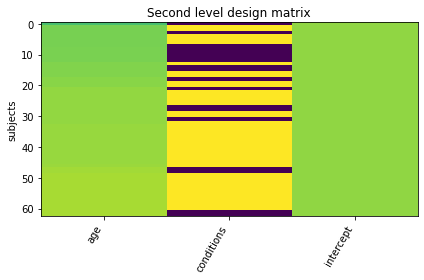

In [8]:
cer_design_matrix = make_second_level_design_matrix(cer_file_id, cer_confounds)
dmn_design_matrix = make_second_level_design_matrix(dmn_file_id, dmn_confounds)
fp_design_matrix = make_second_level_design_matrix(fp_file_id, fp_confounds)
lim_design_matrix = make_second_level_design_matrix(lim_file_id, lim_confounds)
mot_design_matrix = make_second_level_design_matrix(mot_file_id, mot_confounds)
vat_design_matrix = make_second_level_design_matrix(vat_file_id, vat_confounds)
vis_design_matrix = make_second_level_design_matrix(vis_file_id, vis_confounds)

ax = plot_design_matrix(cer_design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('subjects')
plt.tight_layout()
plt.show()

Second level model estimation
===========================================

In [9]:
cer_second_level_input = cer_func
cer_second_level_model = SecondLevelModel().fit(
        cer_second_level_input, design_matrix=cer_design_matrix)

dmn_second_level_input = dmn_func
dmn_second_level_model = SecondLevelModel().fit(
        dmn_second_level_input, design_matrix=dmn_design_matrix)

fp_second_level_input = fp_func
fp_second_level_model = SecondLevelModel().fit(
        fp_second_level_input, design_matrix=fp_design_matrix)

lim_second_level_input = lim_func
lim_second_level_model = SecondLevelModel().fit(
        lim_second_level_input, design_matrix=lim_design_matrix)

mot_second_level_input = mot_func
mot_second_level_model = SecondLevelModel().fit(
        mot_second_level_input, design_matrix=mot_design_matrix)

vat_second_level_input = vat_func
vat_second_level_model = SecondLevelModel().fit(
        vat_second_level_input, design_matrix=vat_design_matrix)

vis_second_level_input = vis_func
vis_second_level_model = SecondLevelModel().fit(
        vis_second_level_input, design_matrix=vis_design_matrix)

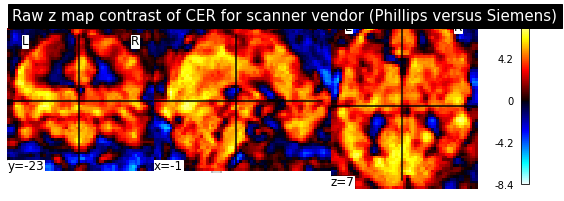

In [10]:
cer_zmap_conditions = cer_second_level_model.compute_contrast(
    'conditions', second_level_stat_type='t',output_type='z_score')
plotting.plot_stat_map(cer_zmap_conditions, 
                       title='Raw z map contrast of CER for scanner vendor (Phillips versus Siemens)')
plotting.show()

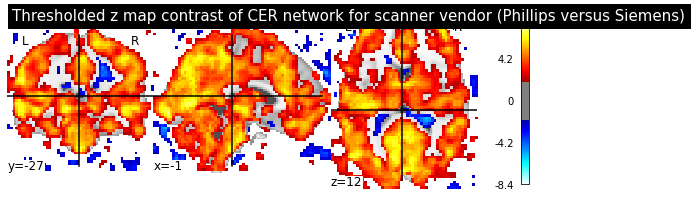

In [11]:
plotting.plot_stat_map(cer_zmap_conditions, threshold=2, 
                       title='Thresholded z map contrast of CER network for scanner vendor (Phillips versus Siemens)')
plotting.show()

Bonferroni-corrected, p<0.05 threshold: 5.134


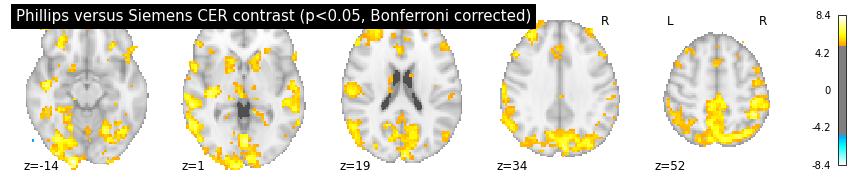

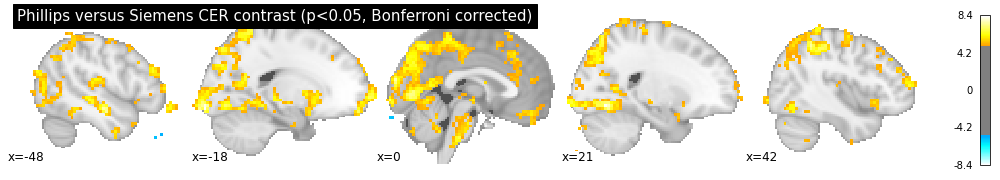

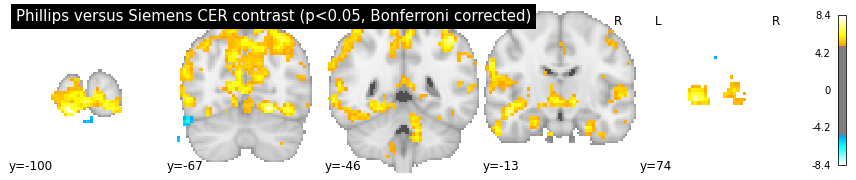

In [12]:
_, threshold = map_threshold(cer_zmap_conditions, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(cer_zmap_conditions, threshold=threshold, display_mode='z', cut_coords=5,
              title='Phillips versus Siemens CER contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(cer_zmap_conditions, threshold=threshold, display_mode='x', cut_coords=5,
              title='Phillips versus Siemens CER contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(cer_zmap_conditions, threshold=threshold, display_mode='y', cut_coords=5,
              title='Phillips versus Siemens CER contrast (p<0.05, Bonferroni corrected)')
plt.show()

In [13]:
get_clusters_table(cer_zmap_conditions, stat_threshold=threshold, cluster_threshold=None)

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-18.0,-100.0,-14.0,8.417925,203256
1,1a,21.0,-67.0,-11.0,8.320414,
2,1b,3.0,-94.0,19.0,7.942433,
3,1c,-36.0,-91.0,-11.0,7.733040,
4,2,-21.0,74.0,-2.0,7.647222,25515
...,...,...,...,...,...,...
220,176,27.0,11.0,58.0,5.139860,27
221,177,48.0,-70.0,37.0,5.136794,27
222,178,12.0,-88.0,-35.0,5.135959,27
223,179,48.0,-70.0,1.0,5.135847,27


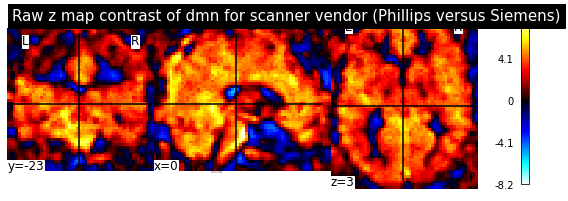

In [14]:
dmn_zmap_conditions = dmn_second_level_model.compute_contrast(
    'conditions', second_level_stat_type='t',output_type='z_score')
plotting.plot_stat_map(dmn_zmap_conditions, 
                       title='Raw z map contrast of dmn for scanner vendor (Phillips versus Siemens)')
plotting.show()

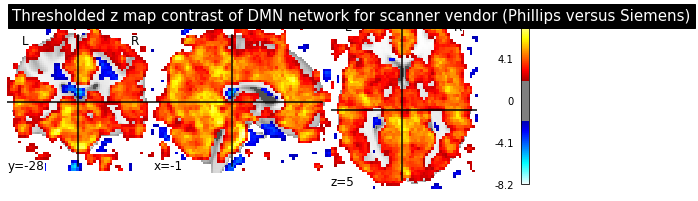

In [15]:
plotting.plot_stat_map(dmn_zmap_conditions, threshold=2, 
                       title='Thresholded z map contrast of DMN network for scanner vendor (Phillips versus Siemens)')
plotting.show()

Bonferroni-corrected, p<0.05 threshold: 5.134


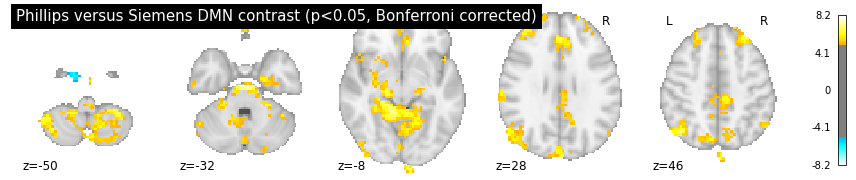

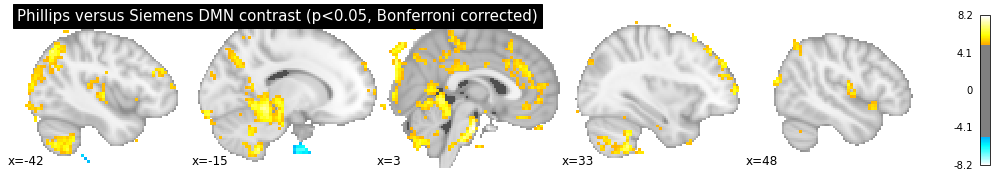

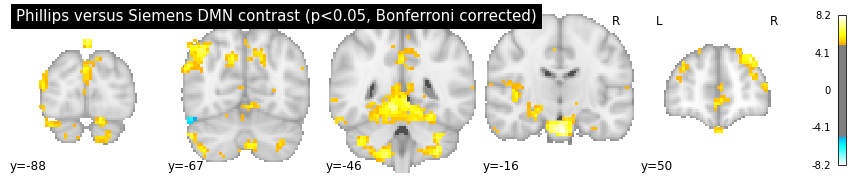

In [16]:
_, threshold = map_threshold(dmn_zmap_conditions, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(dmn_zmap_conditions, threshold=threshold, display_mode='z', cut_coords=5,
              title='Phillips versus Siemens DMN contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(dmn_zmap_conditions, threshold=threshold, display_mode='x', cut_coords=5,
              title='Phillips versus Siemens DMN contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(dmn_zmap_conditions, threshold=threshold, display_mode='y', cut_coords=5,
              title='Phillips versus Siemens DMN contrast (p<0.05, Bonferroni corrected)')
plt.show()

In [17]:
get_clusters_table(dmn_zmap_conditions, stat_threshold=threshold, cluster_threshold=None)

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,3.0,-16.0,-32.0,8.175837,54972
1,1a,-15.0,-40.0,-11.0,7.384593,
2,1b,0.0,-49.0,-2.0,7.356330,
3,1c,-21.0,-37.0,-23.0,7.168233,
4,2,30.0,50.0,37.0,7.446387,7533
...,...,...,...,...,...,...
277,233,30.0,-82.0,-41.0,5.140395,27
278,234,-36.0,2.0,-8.0,5.139929,27
279,235,3.0,-55.0,37.0,5.138392,27
280,236,-3.0,-64.0,52.0,5.137165,27


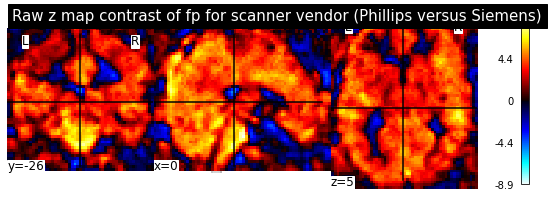

In [18]:
fp_zmap_conditions = fp_second_level_model.compute_contrast(
    'conditions', second_level_stat_type='t',output_type='z_score')
plotting.plot_stat_map(fp_zmap_conditions, 
                       title='Raw z map contrast of fp for scanner vendor (Phillips versus Siemens)')
plotting.show()

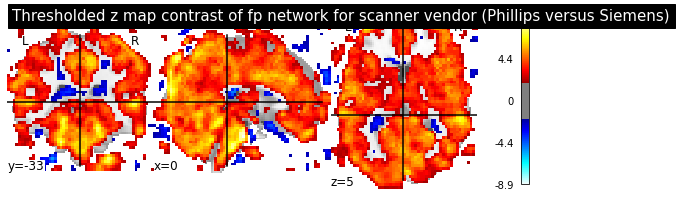

In [19]:
plotting.plot_stat_map(fp_zmap_conditions, threshold=2, 
                       title='Thresholded z map contrast of fp network for scanner vendor (Phillips versus Siemens)')
plotting.show()

Bonferroni-corrected, p<0.05 threshold: 5.134


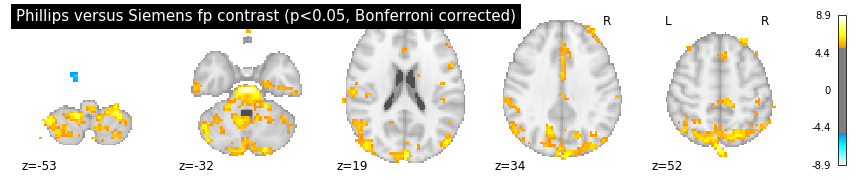

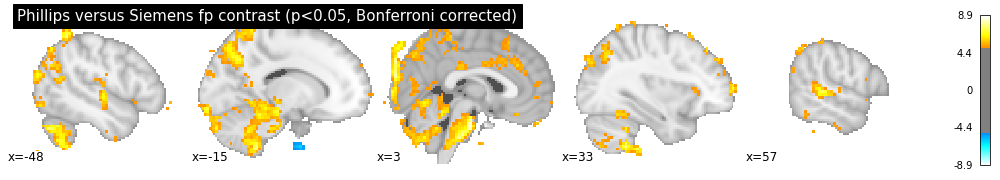

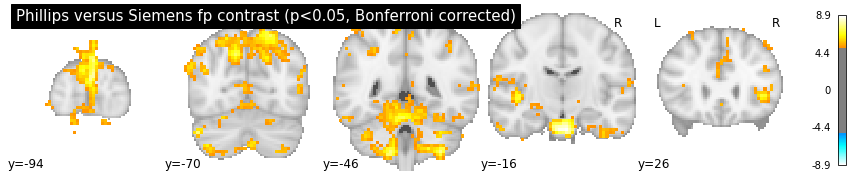

In [20]:
_, threshold = map_threshold(fp_zmap_conditions, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(fp_zmap_conditions, threshold=threshold, display_mode='z', cut_coords=5,
              title='Phillips versus Siemens fp contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(fp_zmap_conditions, threshold=threshold, display_mode='x', cut_coords=5,
              title='Phillips versus Siemens fp contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(fp_zmap_conditions, threshold=threshold, display_mode='y', cut_coords=5,
              title='Phillips versus Siemens fp contrast (p<0.05, Bonferroni corrected)')
plt.show()

In [21]:
get_clusters_table(fp_zmap_conditions, stat_threshold=threshold, cluster_threshold=None)

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,3.0,-16.0,-32.0,8.850087,153009
1,1a,3.0,-94.0,19.0,7.988354,
2,1b,-3.0,-85.0,52.0,7.938145,
3,1c,-21.0,-34.0,-38.0,7.876338,
4,2,57.0,-34.0,4.0,7.426814,3429
...,...,...,...,...,...,...
268,238,0.0,53.0,16.0,5.135122,27
269,239,57.0,-16.0,-35.0,5.134959,27
270,240,45.0,-61.0,4.0,5.134796,27
271,241,-33.0,50.0,40.0,5.134554,27


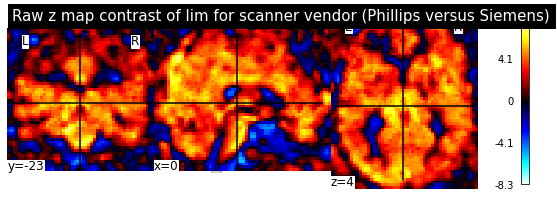

In [22]:
lim_zmap_conditions = lim_second_level_model.compute_contrast(
    'conditions', second_level_stat_type='t',output_type='z_score')
plotting.plot_stat_map(lim_zmap_conditions, 
                       title='Raw z map contrast of lim for scanner vendor (Phillips versus Siemens)')
plotting.show()

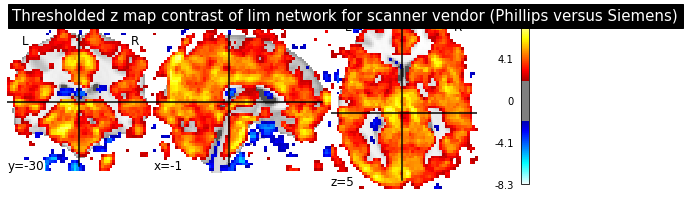

In [23]:
plotting.plot_stat_map(lim_zmap_conditions, threshold=2, 
                       title='Thresholded z map contrast of lim network for scanner vendor (Phillips versus Siemens)')
plotting.show()

Bonferroni-corrected, p<0.05 threshold: 5.134


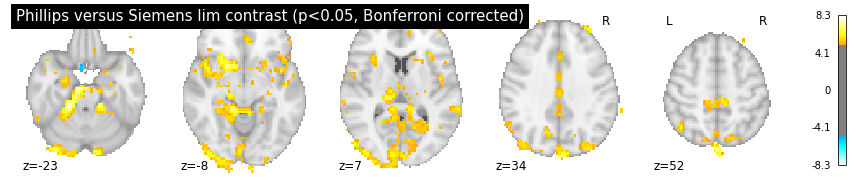

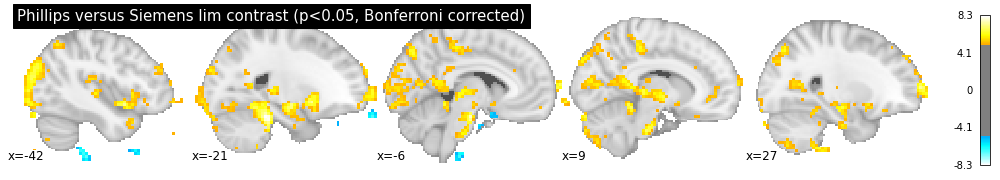

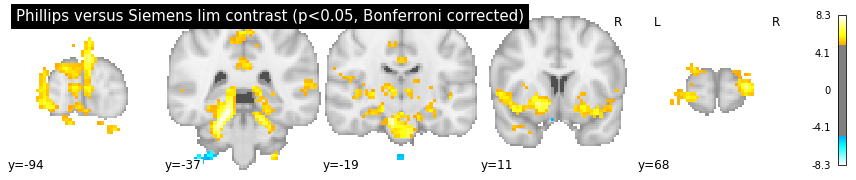

In [24]:
_, threshold = map_threshold(lim_zmap_conditions, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(lim_zmap_conditions, threshold=threshold, display_mode='z', cut_coords=5,
              title='Phillips versus Siemens lim contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(lim_zmap_conditions, threshold=threshold, display_mode='x', cut_coords=5,
              title='Phillips versus Siemens lim contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(lim_zmap_conditions, threshold=threshold, display_mode='y', cut_coords=5,
              title='Phillips versus Siemens lim contrast (p<0.05, Bonferroni corrected)')
plt.show()

In [25]:
get_clusters_table(lim_zmap_conditions, stat_threshold=threshold, cluster_threshold=None)

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-21.0,-37.0,-23.0,8.292307,108891
1,1a,-15.0,-37.0,-17.0,8.146777,
2,1b,-9.0,-19.0,-26.0,8.013092,
3,1c,-24.0,-10.0,-14.0,7.682047,
4,2,27.0,68.0,7.0,7.384610,11070
...,...,...,...,...,...,...
214,183,39.0,14.0,-32.0,5.137515,27
215,184,-33.0,-4.0,-26.0,5.137154,27
216,185,-33.0,-76.0,-50.0,5.136672,27
217,186,-66.0,-46.0,-5.0,5.136345,27


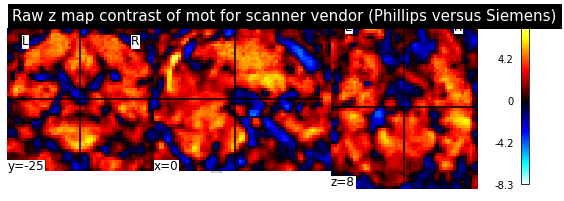

In [26]:
mot_zmap_conditions = mot_second_level_model.compute_contrast(
    'conditions', second_level_stat_type='t',output_type='z_score')
plotting.plot_stat_map(mot_zmap_conditions, 
                       title='Raw z map contrast of mot for scanner vendor (Phillips versus Siemens)')
plotting.show()

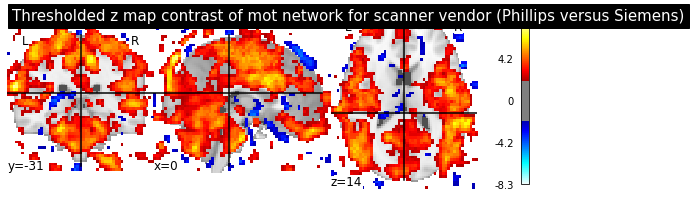

In [27]:
plotting.plot_stat_map(mot_zmap_conditions, threshold=2, 
                       title='Thresholded z map contrast of mot network for scanner vendor (Phillips versus Siemens)')
plotting.show()

Bonferroni-corrected, p<0.05 threshold: 5.134


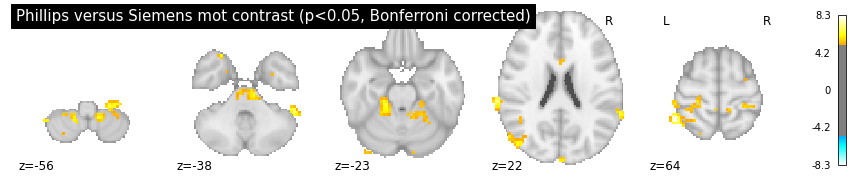

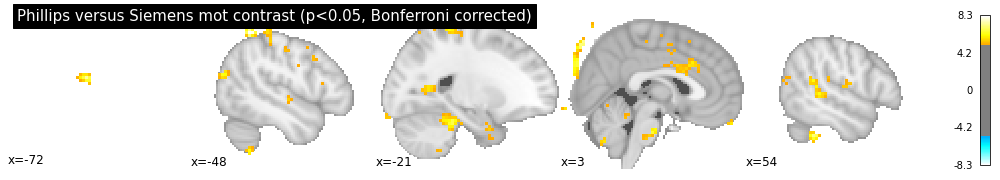

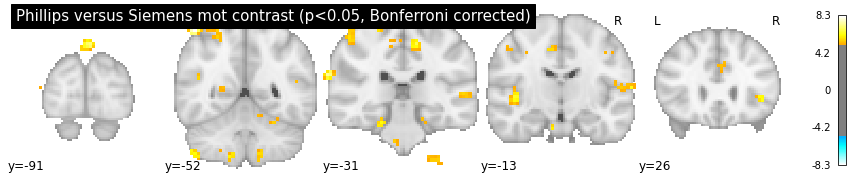

In [28]:
_, threshold = map_threshold(mot_zmap_conditions, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(mot_zmap_conditions, threshold=threshold, display_mode='z', cut_coords=5,
              title='Phillips versus Siemens mot contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(mot_zmap_conditions, threshold=threshold, display_mode='x', cut_coords=5,
              title='Phillips versus Siemens mot contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(mot_zmap_conditions, threshold=threshold, display_mode='y', cut_coords=5,
              title='Phillips versus Siemens mot contrast (p<0.05, Bonferroni corrected)')
plt.show()

In [29]:
get_clusters_table(mot_zmap_conditions, stat_threshold=threshold, cluster_threshold=None)

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-48.0,-52.0,64.0,8.328212,1593
1,1a,-39.0,-55.0,67.0,7.784349,
2,2,-72.0,-31.0,22.0,7.487469,945
3,3,3.0,-88.0,55.0,7.367461,2295
4,3a,3.0,-94.0,31.0,6.689273,
...,...,...,...,...,...,...
184,156,-3.0,-31.0,55.0,5.141189,27
185,157,-63.0,-34.0,40.0,5.138996,27
186,158,30.0,-7.0,64.0,5.136094,27
187,159,15.0,-58.0,-53.0,5.134530,27


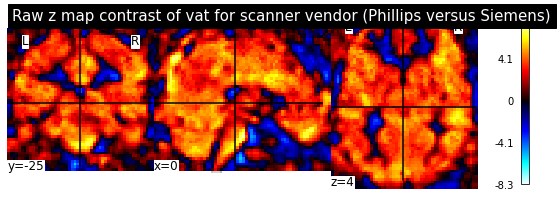

In [30]:
vat_zmap_conditions = vat_second_level_model.compute_contrast(
    'conditions', second_level_stat_type='t',output_type='z_score')
plotting.plot_stat_map(vat_zmap_conditions, 
                       title='Raw z map contrast of vat for scanner vendor (Phillips versus Siemens)')
plotting.show()

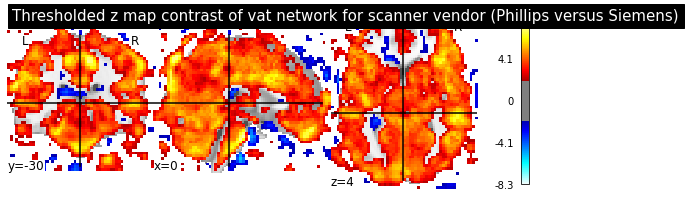

In [31]:
plotting.plot_stat_map(vat_zmap_conditions, threshold=2, 
                       title='Thresholded z map contrast of vat network for scanner vendor (Phillips versus Siemens)')
plotting.show()

Bonferroni-corrected, p<0.05 threshold: 5.134


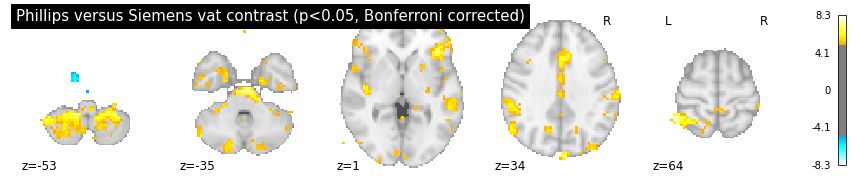

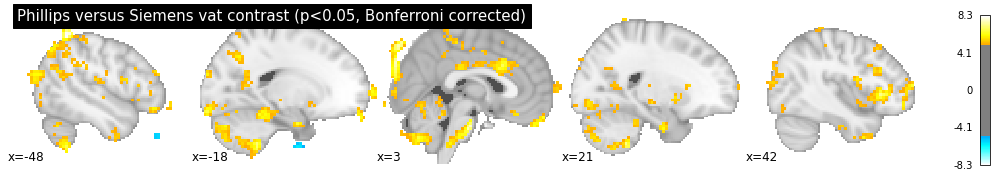

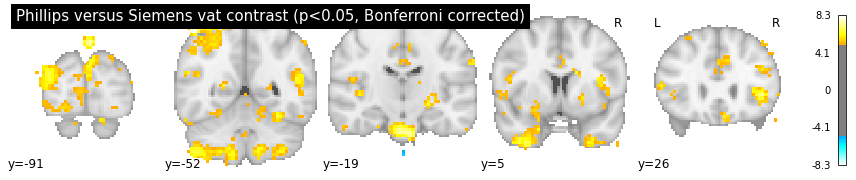

In [32]:
_, threshold = map_threshold(vat_zmap_conditions, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(vat_zmap_conditions, threshold=threshold, display_mode='z', cut_coords=5,
              title='Phillips versus Siemens vat contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(vat_zmap_conditions, threshold=threshold, display_mode='x', cut_coords=5,
              title='Phillips versus Siemens vat contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(vat_zmap_conditions, threshold=threshold, display_mode='y', cut_coords=5,
              title='Phillips versus Siemens vat contrast (p<0.05, Bonferroni corrected)')
plt.show()

In [33]:
get_clusters_table(vat_zmap_conditions, stat_threshold=threshold, cluster_threshold=None)

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-48.0,-52.0,61.0,8.294160,42228
1,1a,3.0,-94.0,34.0,7.663693,
2,1b,3.0,-91.0,52.0,7.599356,
3,1c,-39.0,-55.0,67.0,7.158677,
4,2,3.0,-16.0,-32.0,7.727282,6777
...,...,...,...,...,...,...
335,277,-15.0,-61.0,64.0,5.140583,27
336,278,3.0,26.0,22.0,5.140070,27
337,279,-3.0,29.0,28.0,5.138371,27
338,280,3.0,-40.0,46.0,5.138323,27


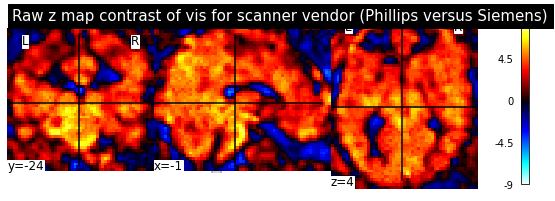

In [34]:
vis_zmap_conditions = vis_second_level_model.compute_contrast(
    'conditions', second_level_stat_type='t',output_type='z_score')
plotting.plot_stat_map(vis_zmap_conditions, 
                       title='Raw z map contrast of vis for scanner vendor (Phillips versus Siemens)')
plotting.show()

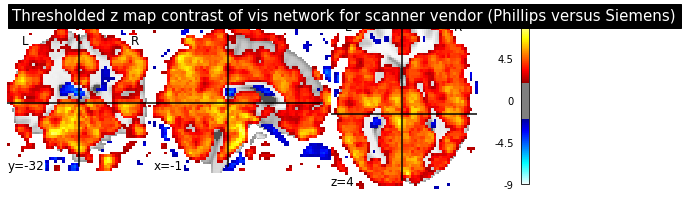

In [35]:
plotting.plot_stat_map(vis_zmap_conditions, threshold=2, 
                       title='Thresholded z map contrast of vis network for scanner vendor (Phillips versus Siemens)')
plotting.show()

Bonferroni-corrected, p<0.05 threshold: 5.134


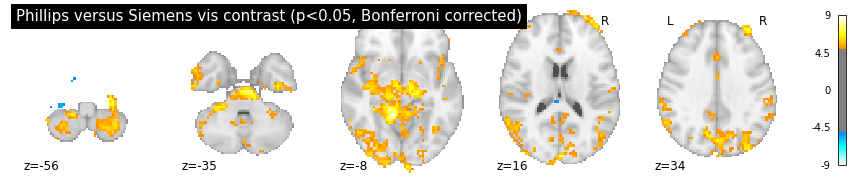

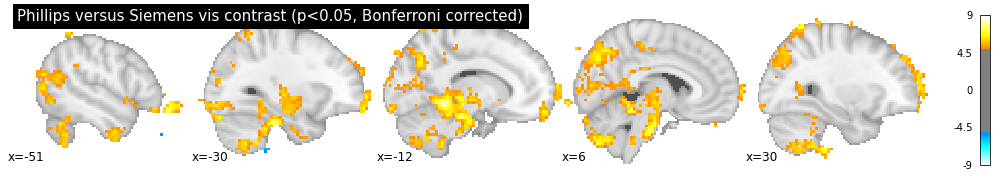

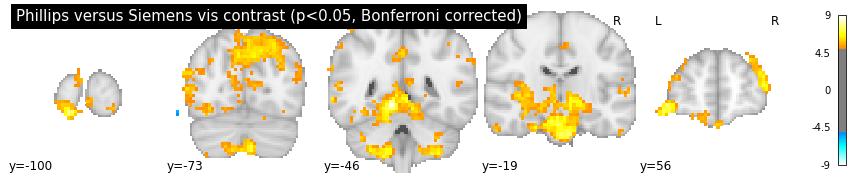

In [36]:
_, threshold = map_threshold(vis_zmap_conditions, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(vis_zmap_conditions, threshold=threshold, display_mode='z', cut_coords=5,
              title='Phillips versus Siemens vis contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(vis_zmap_conditions, threshold=threshold, display_mode='x', cut_coords=5,
              title='Phillips versus Siemens vis contrast (p<0.05, Bonferroni corrected)')
plt.show()

plotting.plot_stat_map(vis_zmap_conditions, threshold=threshold, display_mode='y', cut_coords=5,
              title='Phillips versus Siemens vis contrast (p<0.05, Bonferroni corrected)')
plt.show()

In [37]:
get_clusters_table(vis_zmap_conditions, stat_threshold=threshold, cluster_threshold=None)

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-12.0,-46.0,-8.0,8.963364,83916
1,1a,-27.0,-28.0,-29.0,7.856655,
2,1b,6.0,-19.0,-35.0,7.670232,
3,1c,-9.0,-16.0,-29.0,7.641231,
4,2,-18.0,-100.0,-14.0,8.000650,77571
...,...,...,...,...,...,...
237,199,-48.0,-43.0,-17.0,5.137691,27
238,200,-27.0,-97.0,22.0,5.136873,27
239,201,-6.0,-55.0,73.0,5.135838,27
240,202,-60.0,-25.0,19.0,5.135356,27
